In [1]:
pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 471.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
import random
def random_numbers(n):
    return [random.random() for _ in range(n)]

random_numbers(10)

[0.1460986865599163,
 0.03026619054336488,
 0.9987521723290353,
 0.5121711030732039,
 0.2975452312176389,
 0.6246666947822455,
 0.6139009170164446,
 0.898154055104486,
 0.7576541200586447,
 0.1364347211395287]

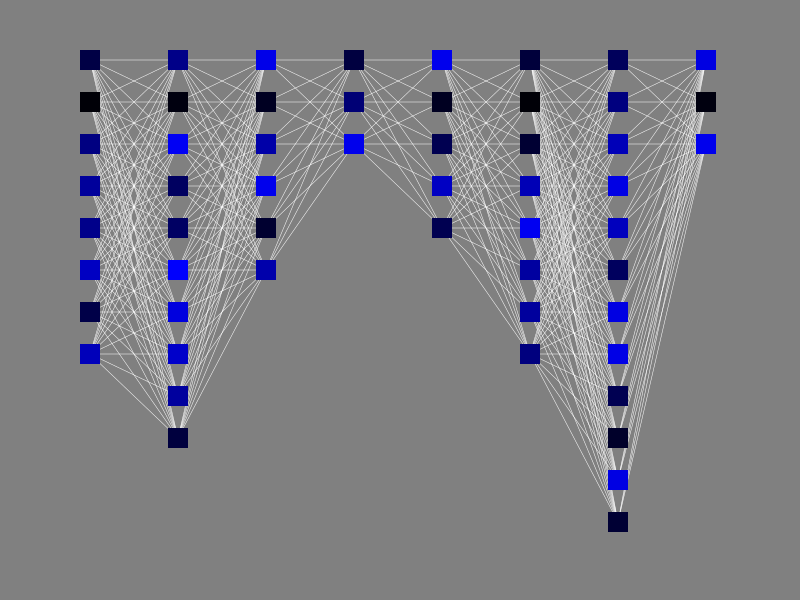

In [154]:
import svgwrite
from svgwrite.utils import rgb

from IPython.display import SVG, display

dwg = svgwrite.Drawing('example.svg', size=(800, 600))

layer_sizes = [8, 10, 6, 3, 5, 8, 12, 3]
layers = [random_numbers(size) for size in layer_sizes]

neuron_size = (20, 20)

def neuron_color(value: float) -> str:
    return rgb(0, 0, value * 255)

def draw_neuron(x: float, y: str, color: str):
    dwg.add(dwg.rect((x, y), neuron_size, fill=color))

def draw_connection(p1: tuple[float, float], p2: tuple[float, float]):
    dwg.add(dwg.line(p1, p2, stroke='white', stroke_width=0.5))

def draw_background(color: str):
    dwg.add(dwg.rect(insert=(0, 0), size=('100%', '100%'), fill=color))

min_x = 80
min_y = 50
neuron_distance = 42
layer_distance = 88

def neuron_x(layer_i): return min_x + layer_i * layer_distance
def neuron_y(neuron_i): return min_y + neuron_i * neuron_distance

draw_background(color=rgb(128, 128, 128))

for (layer_i, layer) in enumerate(layers):
    for (neuron_i, _) in enumerate(layer):
        if layer_i < len(layers) - 1:
            next_layer_i: int = layer_sizes[layer_i + 1]
            for j in range(next_layer_i):
                off_x = neuron_size[0] / 2
                off_y = neuron_size[1] / 2
                x_0 = neuron_x(layer_i) + off_x
                y_0 = neuron_y(neuron_i) + off_y
                x_1 = neuron_x(layer_i+1) + off_x
                y_1 = neuron_y(j) + off_y

                draw_connection(p1=(x_0, y_0), p2=(x_1, y_1))

for (layer_i, layer) in enumerate(layers):
    for (neuron_i, neuron) in enumerate(layer):
        draw_neuron(
            x=neuron_x(layer_i),
            y=neuron_y(neuron_i),
            color=neuron_color(neuron)
        )

display(SVG(dwg.tostring()))

In [64]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]